# MBA FIAP Inteligência Artificial & Machine Learning

## Programando IA com Python
## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Allan Gregory Gilabel           | RM 330158     | `1IA` |
| Douglas Gomes Modesto           | RM 330217     | `1IA` |
| Jonas Pereira Prado de Lima     | RM 330323     | `1IA` |
| Liliane Vieira Scandoleiro      | RM 330672     | `1IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos e, até mesmo, trechos de código-fonte.

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação** 

Carregue o dataset "automobile-mod.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

O dataset oroginal "automobile.csv" se encontra na mesma pasta apenas como referência. Não deverá ser utilizado.

__Atualizado em 16/07/2017__

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv('./data/automobile-mod.csv', sep=';')
df.head(10)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante.

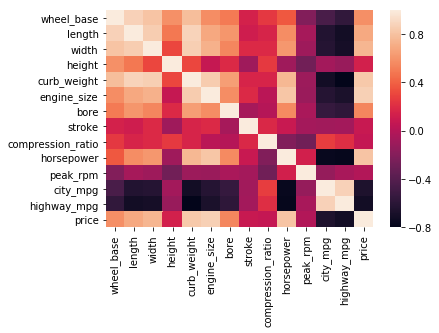

In [3]:
sns.heatmap(df.corr())

In [4]:
correlacao = df.corr()
correlacao['price'].sort_values()

highway_mpg         -0.712812
city_mpg            -0.657661
peak_rpm            -0.006104
compression_ratio    0.071107
stroke               0.081434
height               0.135486
bore                 0.543052
wheel_base           0.584642
length               0.690628
width                0.751265
horsepower           0.810795
curb_weight          0.834415
engine_size          0.872335
price                1.000000
Name: price, dtype: float64

Text(0.5,1,'Preço por Tipo do motor')

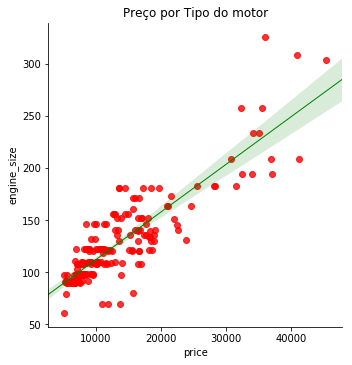

In [5]:
sns.lmplot("price", "engine_size", df,
          scatter_kws={"marker":"x", "color":"red"},
          line_kws={"linewidth":1, "color": "green"},legend_out = True)
ax = plt.gca()
ax.set_title("Preço por Tipo do motor")

Text(0.5,1,'Preço por Peso do automóvel')

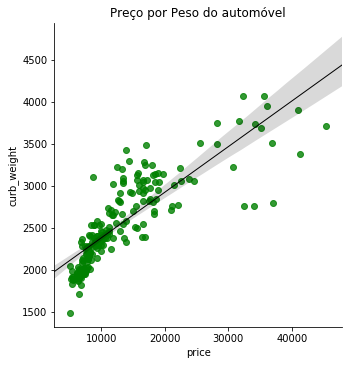

In [6]:
sns.lmplot("price", "curb_weight", df,
          scatter_kws={"marker":"x", "color":"green"},
          line_kws={"linewidth":1, "color": "black"})
ax = plt.gca()
ax.set_title("Preço por Peso do automóvel")

Text(0.5,1,'Preço por Consumo de combustível (estrada)')

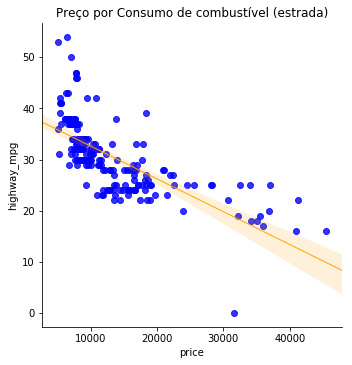

In [7]:
sns.lmplot("price", "highway_mpg", df,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})
ax = plt.gca()
ax.set_title("Preço por Consumo de combustível (estrada)")

Text(0.5,1,'Preço por Força do motor')

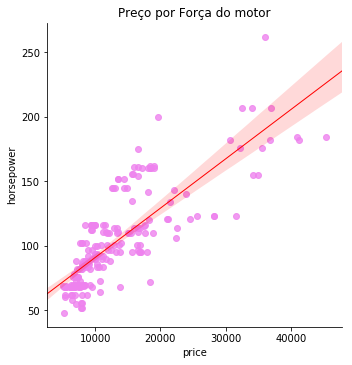

In [8]:
sns.lmplot("price", "horsepower", df,
          scatter_kws={"marker":"x", "color":"violet"},
          line_kws={"linewidth":1, "color": "red"})
ax = plt.gca()
ax.set_title("Preço por Força do motor")

**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:** O preço do carro está fortemente correlacionado positivamente para o tipo do motor, o peso e a sua força. Ou seja, caso as variáveis associadas aumentem o seu valor, o preço do carro aumentará.
Outras duas variáveis relacionadas ao preço, porém de correlação negativa e de menor importância comparado as variáveis citadas anteriormente são o consumo de combustível na cidade e na estrada.

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

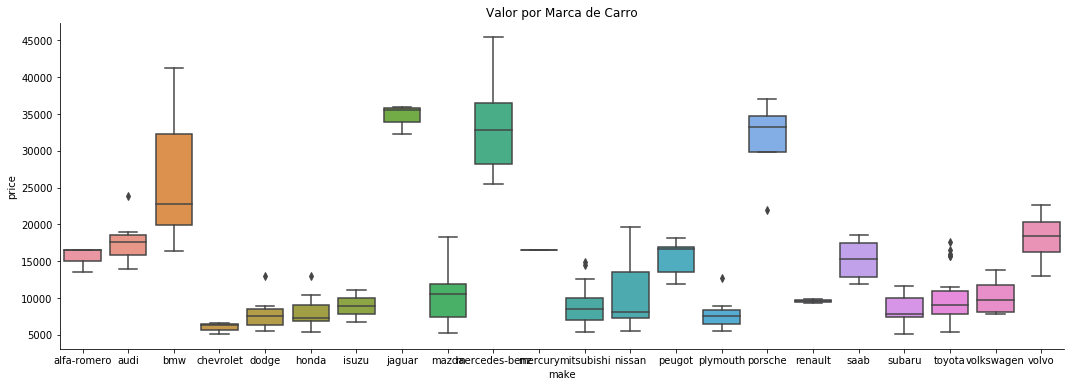

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
sns.boxplot(ax=ax, data=df, y="price", x="make")
plt.title('Valor por Marca de Carro')
sns.despine()

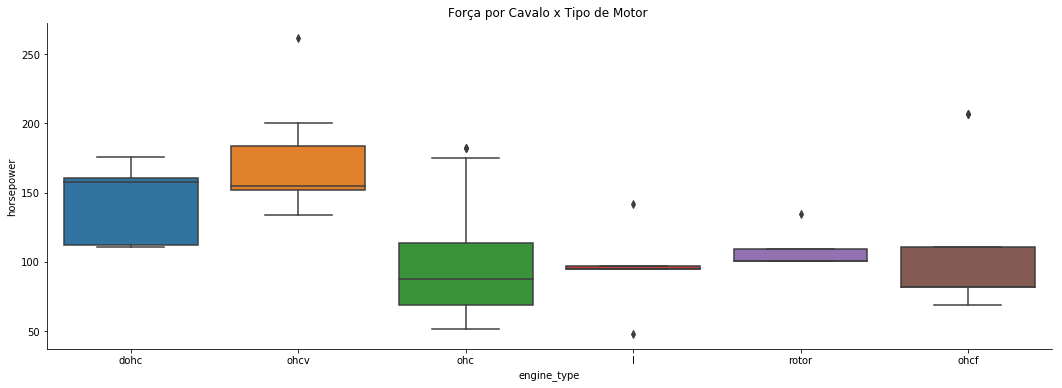

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
sns.boxplot(ax=ax, data=df, y="horsepower", x="engine_type")
plt.title('Força por Cavalo x Tipo de Motor ')
sns.despine()

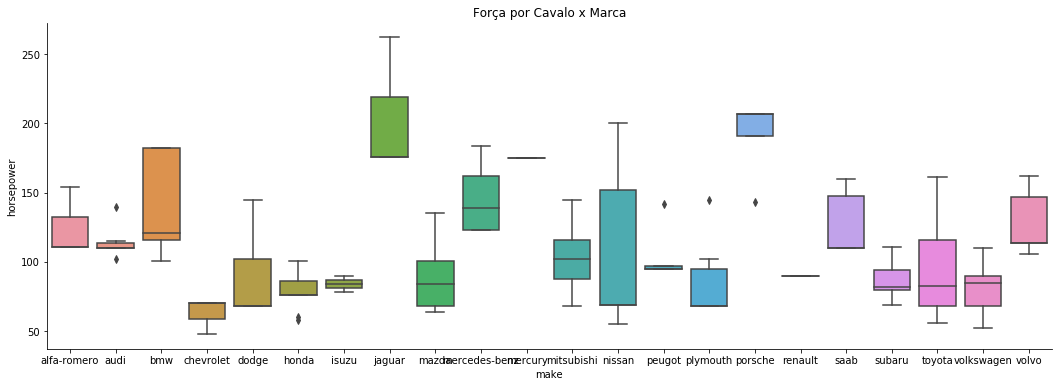

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
sns.boxplot(ax=ax, data=df, y="horsepower", x="make")
plt.title('Força por Cavalo x Marca')
sns.despine()

Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [12]:
df.isnull().sum()

make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               2
city_mpg               1
highway_mpg            1
price                  0
dtype: int64

Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

**Resposta:** Os dados considerados nulos são identificados como contínuas e o tratamento aplicado foi a média dos valores do atributo. A base por possuir poucos dados para se aplicar ao modelo, optamos por não descartá-los, apesar de possuir poucos valores nulos.

In [13]:
df[["peak_rpm","city_mpg","highway_mpg"]] = df[["peak_rpm","city_mpg","highway_mpg"]].replace(np.nan,df[["peak_rpm","city_mpg","highway_mpg"]].mean())


### Análise de valores com valores iguais a 0

Analise no conjunto de dados se há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [14]:
(df == 0).any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg                True
highway_mpg             True
price                  False
dtype: bool

A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.

In [15]:
df[["peak_rpm","city_mpg","highway_mpg"]] = df[["peak_rpm","city_mpg","highway_mpg"]].replace(0,df[["peak_rpm","city_mpg","highway_mpg"]].mean())
(df[["peak_rpm","city_mpg","highway_mpg"]] == 0).any()

peak_rpm       False
city_mpg       False
highway_mpg    False
dtype: bool

<function matplotlib.pyplot.plot(*args, **kwargs)>

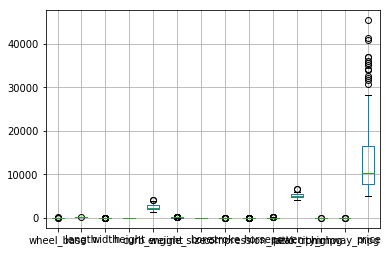

In [16]:
#Identificando outliers com Turkey boxplot

df.boxplot(return_type='dict')
plt.plot

### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q2 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [17]:
def identificacao_outlier(df, column_name): 
    
    Q1 = np.percentile(df[column_name], 25)
    Q2 = np.percentile(df[column_name], 50)
    Q3 = np.percentile(df[column_name], 75)
    
    lista_lower = ['Lowers']
    lista_upper = ['Uppers']
    
    passo_limite = ((Q3 - Q1)*5)
    
    for item in df[column_name]:
        if item < (Q2-passo_limite):
            lista_lower.append(item)
        elif item > (Q3 + passo_limite):
            lista_upper.append(item)
    
    print(column_name)
    print(lista_lower)
    print(lista_upper)

In [18]:
df.describe()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.329701,3.261741,10.164279,103.263682,5113.190330,25.173010,30.696965,13207.129353
std,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268166,0.317875,4.004965,37.389372,467.977351,6.416775,6.799249,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [19]:
identificacao_outlier(df, 'highway_mpg')
identificacao_outlier(df, 'price')
identificacao_outlier(df, 'horsepower')
identificacao_outlier(df, 'length')
identificacao_outlier(df, 'width')
identificacao_outlier(df, 'height')
identificacao_outlier(df, 'curb_weight')
identificacao_outlier(df, 'stroke')
identificacao_outlier(df, 'peak_rpm')
identificacao_outlier(df, 'city_mpg')
identificacao_outlier(df, 'highway_mpg')
identificacao_outlier(df, 'compression_ratio')

highway_mpg
['Lowers']
['Uppers']
price
['Lowers']
['Uppers']
horsepower
['Lowers']
['Uppers']
length
['Lowers']
['Uppers']
width
['Lowers']
['Uppers']
height
['Lowers']
['Uppers']
curb_weight
['Lowers']
['Uppers']
stroke
['Lowers']
['Uppers']
peak_rpm
['Lowers']
['Uppers']
city_mpg
['Lowers']
['Uppers']
highway_mpg
['Lowers']
['Uppers']
compression_ratio
['Lowers']
['Uppers', 22.7, 22.0, 21.5, 21.5, 21.5, 21.5, 21.9, 21.0, 21.0, 21.0, 21.0, 21.0, 22.5, 22.5, 22.5, 23.0, 23.0, 23.0, 23.0, 23.0]


**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:** Segundo o Método Turco para identificação de *outliers*, há valores discrepantes a serem avaliados apenas na coluna **compression_ratio** (taxa de compressão). 

Estes dados devem ser mantidos, devido a relevância no desempenho do veículo. Quanto maior a taxa de compressão, maior o rendimento do motor. Porém, há um limite: a qualidade do combustível. 

Em um carro a base de gasolina, a taxa fica por volta de 8 (ou seja, o volume final é 8 vezes menor do que o original). Mais do que isso, a gasolina sofre pré-detonação ou a famosa "batida de pino". Para um carro a base de álcool, a taxa fica por volta de 12. Então dizemos que um carro a álcool tem taxa de compressão alta. Os carros Flex trabalham com uma taxa média



### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [20]:
df.dtypes

make                    object
fuel_type               object
aspiration              object
number_of_doors         object
body_style              object
drive_wheels            object
engine_location         object
wheel_base             float64
length                 float64
width                  float64
height                 float64
curb_weight              int64
engine_type             object
number_of_cylinders     object
engine_size              int64
fuel_system             object
bore                   float64
stroke                 float64
compression_ratio      float64
horsepower               int64
peak_rpm               float64
city_mpg               float64
highway_mpg            float64
price                    int64
dtype: object

In [21]:
def dicionarios(df, column_name, serie):
    dict_gen = []
    count = 0
    for item in serie:
        dict_gen.append([item, count])        

        count = count +1

    return dict_gen

In [22]:
def preprocess_features(dframe):
    dicionario = []
    for column in dframe:
        enc = LabelEncoder()
        if(column in ['make','fuel_type','aspiration','number_of_doors','drive_wheels', 'engine_location', 'engine_type',
                      'number_of_cylinders','body_style','fuel_system']):
            dicionario.append([column, dicionarios(df, column, np.unique(df[column]))])
            dframe[column] = enc.fit_transform(dframe[column])
            
    
    return [dframe, dicionario]


Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [23]:
data = preprocess_features(df)

In [24]:
print(data[1])

[['make', [['alfa-romero', 0], ['audi', 1], ['bmw', 2], ['chevrolet', 3], ['dodge', 4], ['honda', 5], ['isuzu', 6], ['jaguar', 7], ['mazda', 8], ['mercedes-benz', 9], ['mercury', 10], ['mitsubishi', 11], ['nissan', 12], ['peugot', 13], ['plymouth', 14], ['porsche', 15], ['renault', 16], ['saab', 17], ['subaru', 18], ['toyota', 19], ['volkswagen', 20], ['volvo', 21]]], ['fuel_type', [['diesel', 0], ['gas', 1]]], ['aspiration', [['std', 0], ['turbo', 1]]], ['number_of_doors', [['four', 0], ['two', 1]]], ['body_style', [['convertible', 0], ['hardtop', 1], ['hatchback', 2], ['sedan', 3], ['wagon', 4]]], ['drive_wheels', [['4wd', 0], ['fwd', 1], ['rwd', 2]]], ['engine_location', [['front', 0], ['rear', 1]]], ['engine_type', [['dohc', 0], ['l', 1], ['ohc', 2], ['ohcf', 3], ['ohcv', 4], ['rotor', 5]]], ['number_of_cylinders', [['eight', 0], ['five', 1], ['four', 2], ['six', 3], ['three', 4], ['twelve', 5], ['two', 6]]], ['fuel_system', [['1bbl', 0], ['2bbl', 1], ['4bbl', 2], ['idi', 3], ['mfi

Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diese", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [25]:
data[0].head(20)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,0,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,0,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,1,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,1,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,1,1,0,1,3,1,0,99.8,177.3,66.3,...,136,5,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,1,1,0,0,3,1,0,105.8,192.7,71.4,...,136,5,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,1,1,0,0,4,1,0,105.8,192.7,71.4,...,136,5,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,1,1,1,0,3,1,0,105.8,192.7,71.4,...,131,5,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,2,1,0,1,3,2,0,101.2,176.8,64.8,...,108,5,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Regressão Linear**

Análise de regressão é uma metodologia estatística que utiliza a relação entre duas ou mais variáveis quantitativas (ou qualitativas) de tal forma que uma variável pode ser predita a partir de outra ou outras.*Exemplo:*

- Predição da população de bactérias a partir da relação entre população e o tempo de armazenamento.

- Concentrações de Soluções de proteína de arroz integral e absorbâncias médias corrigidas
- Número de falhas em uma obra e a satisfação média dos construtores
- Dias de atraso de entrega x número de dias chuvosos

** --------------------------------------------------------------------------------------------------------------------- **

**Árvores de Decisão**

Árvore de decisão é um tipo de algoritmo de aprendizagem supervisionada (com uma variável alvo pré-definida), utilizada em problemas de classificação ou regressão. Ele funciona tanto para as variáveis categóricas quanto contínuas de entrada e saída. 

O algoritmo utiliza a estratégia de dividir para conquistar: um problema complexo é decomposto em sub-problemas mais simples e recursivamente esta técnica é aplicada a cada sub-problema.*Exemplo:*

- Qual jogo escolher?
- Classificação de empréstimo bancário para um cliente


** --------------------------------------------------------------------------------------------------------------------- **



**Regressão Ridge**

A regressão Ridge é uma regressão derivada da Regressão Linear que além de levar em conta o erro do treino também leva em consideração a medida da magnitude, buscando assim evitar o overffiting. Possui como objetivo suavizar atributos que sejam relacionados uns aos outros e que aumentam o ruído no modelo, através do encolhimento dos coeficientes da regressão linear por meio da imposição de uma penalidade aos seus tamanhos.*Exemplo:*



Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e qual seria o atributo preditor?

In [26]:
x = data[0].drop(columns='price')
y = data[0]['price']

Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.3, random_state=500)

Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [28]:
#Inspeção de X_train

X_train.describe()

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,12.400000,0.892857,0.178571,0.421429,2.678571,1.328571,0.014286,98.747857,173.847143,65.750714,...,2.214286,125.850000,3.164286,3.316571,3.268929,10.275143,103.092857,5102.774587,25.456607,30.950643
std,6.199095,0.310405,0.384368,0.495561,0.807054,0.542348,0.119092,5.946857,12.373082,1.998435,...,0.854827,43.978563,2.041338,0.276311,0.321940,4.150536,39.066609,492.921628,6.569395,6.913688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,...,0.000000,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,8.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,64.150000,...,2.000000,97.000000,1.000000,3.150000,3.117500,8.675000,70.000000,4800.000000,19.000000,25.000000
50%,12.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,96.700000,172.500000,65.450000,...,2.000000,110.000000,3.000000,3.280000,3.320000,9.000000,94.000000,5100.000000,25.000000,31.000000
75%,19.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.100000,181.550000,66.500000,...,2.000000,142.000000,5.000000,3.590000,3.462500,9.400000,117.000000,5500.000000,30.000000,36.000000
max,21.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,72.000000,...,6.000000,326.000000,7.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,47.000000,53.000000


In [29]:
#Inspeção de X_test

X_test.describe()

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
count,61.000000,61.000000,61.000000,61.000000,61.00000,61.000000,61.000000,61.000000,61.000000,61.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,12.065574,0.918033,0.180328,0.459016,2.47541,1.344262,0.016393,98.909836,175.013115,66.206557,...,1.950820,129.229508,3.475410,3.359836,3.245246,9.909836,103.655738,5137.095313,24.522131,30.114754
std,6.420978,0.276591,0.387651,0.502453,0.97650,0.574028,0.128037,6.381345,12.267497,2.306792,...,0.560542,35.567023,1.945992,0.248015,0.310331,3.669092,33.525555,407.787588,6.054036,6.547514
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,86.600000,144.600000,63.600000,...,0.000000,90.000000,0.000000,2.910000,2.190000,7.000000,56.000000,4150.000000,15.000000,18.000000
25%,8.000000,1.000000,0.000000,0.000000,2.00000,1.000000,0.000000,94.500000,168.700000,64.100000,...,2.000000,98.000000,1.000000,3.190000,3.100000,8.500000,82.000000,4800.000000,19.000000,25.000000
50%,12.000000,1.000000,0.000000,0.000000,3.00000,1.000000,0.000000,97.300000,174.600000,65.600000,...,2.000000,122.000000,5.000000,3.390000,3.290000,9.000000,101.000000,5200.000000,24.000000,30.000000
75%,18.000000,1.000000,0.000000,1.000000,3.00000,2.000000,0.000000,103.300000,186.600000,67.700000,...,2.000000,141.000000,5.000000,3.580000,3.400000,9.400000,114.000000,5500.000000,27.000000,34.000000
max,21.000000,1.000000,1.000000,1.000000,4.00000,2.000000,1.000000,115.600000,202.600000,71.700000,...,3.000000,234.000000,6.000000,3.780000,3.900000,23.000000,207.000000,6600.000000,49.000000,54.000000


In [30]:
#Inspeção de y_train

Y_train.describe()

count      140.000000
mean     13045.507143
std       8116.800429
min       5118.000000
25%       7490.000000
50%      10221.500000
75%      16106.000000
max      45400.000000
Name: price, dtype: float64

In [31]:
#Inspeção de Y_test

Y_test.describe()

count       61.000000
mean     13578.065574
std       7595.461355
min       5389.000000
25%       8189.000000
50%      11199.000000
75%      16558.000000
max      36880.000000
Name: price, dtype: float64

Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divida o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [32]:
#IMPLEMENTAÇÃO
razaoTreino =  round(Y_train.count() / y.count(),2) 
razaoTest =  round(Y_test.count() / y.count(),2)

dfRazao = []

dfRazao.append(['Teste', razaoTest])
dfRazao.append(['Treino', razaoTreino])

dfRazao



[['Teste', 0.3], ['Treino', 0.7]]


A divisão estabelicida foi 30% do Dataframe para teste e 70% para treino. Conforme verificado no código acima, a razão dos dados fazem total sentido, levando em consideração que estão seguindo as especificações que definimos no momento da divisão do dataFrame.

## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, X_test, Y_test):
    Y_pred = modelo.predict(X_test)
    
    print("%s R2 score: %.2f" %(round(modelo,r2_score(Y_test, Y_pred),2)))

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [34]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, Y_train.ravel())
y_pred = lr_model.predict(X_test)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [35]:
pontuacao(lr_model, X_test, Y_test)
pontuacao(lr_model, X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) R2 score: 0.86
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) R2 score: 0.90


### Regressão de árvore de Decisão

In [36]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [37]:
pontuacao(dtr_model, X_test, Y_test)
pontuacao(dtr_model, X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') R2 score: 0.88
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') R2 score: 1.00


### Regressão Ridge

In [38]:
lrr_model = linear_model.Ridge()
lrr_model.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [39]:
pontuacao(lrr_model, X_test, Y_test)
pontuacao(lrr_model, X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) R2 score: 0.87
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) R2 score: 0.89


**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:** Abaixo segue os resultados através do score para a base de treino e teste de cada algoritmo.

    


|           | Regressão Linear   | Árvore de Decisão | Ridge      |
|:----------|:------------------:|:-----------------:|:----------:|
| R2 treino |      0.86          |      1.00         |   0.86     |
| R2 teste  |      0.90          |     0.88          |   0.82     |




Analisando os resultados, o algoritmo que obteve melhor performance foi o de Regressão Linear, devido a relação entre a variável dependente *(price)* com as **N** variáveis independentes da base de dados.

Apesar do modelo de Árvore de Decisão obter score de 1.0, conclui-se que houve overfitting pois o modelo se ajusta muito bem aos dados, porém o modelo só servirá para a base de dados utilizada para construção. Caso seja inserido novos dados para ser predito, o modelo será impreciso em seu resultado.


## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```. 

In [40]:
from sklearn.model_selection import GridSearchCV
        
parameters =  [{'copy_X':[True, False],
                'n_jobs': range(1, 20),
                'normalize':[True, False] }]

opt_model_lr = GridSearchCV(lr_model, parameters, scoring='r2')
opt_model_lr.fit(X_train, Y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'copy_X': [True, False], 'n_jobs': range(1, 20), 'normalize': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [68]:
print("best_index", opt_model_lr.best_index_)
print("best_score", round(opt_model_lr.best_score_,2))
print("best_params", opt_model_lr.best_params_)

best_index 0
best_score 0.78
best_params {'copy_X': True, 'n_jobs': 1, 'normalize': True}


Calcule as pontuações para o melhor estimador com dados de treino.

In [67]:
round(opt_model_lr.score(X_train, Y_train.ravel()),2), opt_model_lr.best_estimator_

(0.9,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))

E também para os dados de testes.

In [66]:
round(opt_model_lr.score(X_test, Y_test.ravel()),2), opt_model_lr.best_estimator_

(0.86,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))

### Regulação do Modelo de Regressão de Árvore de Decisão

In [44]:
from sklearn.model_selection import GridSearchCV
parameters =  [{'splitter':('best','random'),
               'max_depth':range(1,10),
               'min_samples_leaf':[1,2,4],
               'min_samples_split': range(2, 10)}]

opt_model_dtr = GridSearchCV(dtr_model, parameters, scoring='r2')
opt_model_dtr.fit(X_train, Y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'splitter': ('best', 'random'), 'max_depth': range(1, 10), 'min_samples_leaf': [1, 2, 4], 'min_samples_split': range(2, 10)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [72]:
print("best_index", opt_model_dtr.best_index_)
print("best_score", round(opt_model_dtr.best_score_,2))
print("best_params", opt_model_dtr.best_params_)

best_index 287
best_score 0.87
best_params {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 9, 'splitter': 'random'}


Pontuação dos dados de treino.

In [74]:
best = opt_model_dtr.best_estimator_
print('R2: ', round(r2_score(y_pred = best.predict(X_train), y_true = Y_train),2))

R2:  0.83


Pontuação dos dados de teste.

In [75]:
print('R2: ', round(r2_score(y_pred = best.predict(X_test), y_true = Y_test),2))

R2:  0.75


### Regulação do Modelo de Regressão Ridge

In [48]:
parameters = [{'alpha': range(1, 10),
               'fit_intercept': [True, False],
               'max_iter': range(0,20),
               'normalize': [True, False]}]


opt_model_lrr = GridSearchCV(lrr_model, parameters, scoring='r2')
opt_model_lrr.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': range(1, 10), 'fit_intercept': [True, False], 'max_iter': range(0, 20), 'normalize': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [62]:
print("best_index", opt_model_lrr.best_index_)
print("best_score", round(opt_model_lrr.best_score_,2))
print("best_params", opt_model_lrr.best_params_)

best_index 641
best_score 0.81
best_params {'alpha': 9, 'fit_intercept': True, 'max_iter': 0, 'normalize': False}


Pontuação dos dados de treino.

In [76]:
best = opt_model_lrr.best_estimator_
print('R2: ', round(r2_score(y_pred = best.predict(X_train), y_true = Y_train),2))

R2:  0.88


Pontuação dos dados de teste.

In [77]:
best = opt_model_lrr.best_estimator_
print('R2: ', round(r2_score(y_pred = best.predict(X_test), y_true = Y_test),2))

R2:  0.85


Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

|                     | Regressão linear | Regressão árvore de decisão | Regressão ridge |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| R2 treino |      0.89627     |      0.88799                |   0.87972       |
| R2 teste  |      0.86413     |     0.82926                 |   0.85218       |


**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?


**Resposta:** O melhor foi de Regressão Linear. As características determinantes para esse resultados são:
- Forte correlação entre a variável dependente com as variáveis independentes;
- Ao realizar a alteração no valor de uma varíavel (dita independente) provoca alterações no valor da outra variável (dita dependente)
- Relação funcional entre as variáveis, com mínimo de erro ;


### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [52]:
lr_model = linear_model.LinearRegression(copy_X=True, n_jobs=1, normalize=True)
lr_model.fit(X_train, Y_train.ravel())
y_pred = lr_model.predict(X_test)


### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos



## Exemplo base 'TREINO'

In [59]:
#Lembre-se que os atributos são os armazenados na lista feature_col_names

#rotação por minuto
TRAINconsumoPorGalaoNaEstrada_x_Preco = Y_train.corr(X_train['peak_rpm'])

#diâmetro do cilindro
TRAINlength_x_Preco = Y_train.corr(X_train['bore'])


#tamanho do motor
TRAINengineSize_x_Preco = Y_train.corr(X_train['engine_size'])


print([round(TRAINconsumoPorGalaoNaEstrada_x_Preco,2), round(TRAINlength_x_Preco,2), round(TRAINengineSize_x_Preco,2)])

[-0.12, 0.55, 0.88]


In [54]:
serie_1 = pd.Series([round(TRAINconsumoPorGalaoNaEstrada_x_Preco,2), round(TRAINlength_x_Preco,2), round(TRAINengineSize_x_Preco,2)], 
                    index=['baixo', 'mediano', 'alto'])


serie_1

baixo     -0.12
mediano    0.55
alto       0.88
dtype: float64

## Exemplo base 'TESTE'

In [58]:
#Lembre-se que os atributos são os armazenados na lista feature_col_names

#rotação por minuto
consumoPorGalaoNaEstrada_x_Preco = Y_test.corr(X_test['peak_rpm'])

#diâmetro do cilindro
length_x_Preco = Y_test.corr(X_test['bore'])


#peso do veículo
engineSize_x_Preco = Y_test.corr(X_test['engine_size'])


print([round(consumoPorGalaoNaEstrada_x_Preco,2), round(length_x_Preco,2), round(engineSize_x_Preco,2)])


[-0.02, 0.53, 0.86]


In [56]:
#IMPLEMENTAÇÃO
#A entrada de dados deve ser uma matriz do seguinte formato, note que há dois colchetes pois é uma 
#matriz dentro de outra matriz [[a,b,c,d,e]]

serie_1 = pd.Series([round(consumoPorGalaoNaEstrada_x_Preco,2), round(length_x_Preco,2), round(engineSize_x_Preco,2)], 
                    index=['baixo', 'mediano', 'alto'])

serie_1

baixo     -0.02
mediano    0.53
alto       0.86
dtype: float64

## Consumo por galão na estrada (highway_mpg) x Preço 

Carros que possuem alto consumo de combustível na estrada tendem a ter um preço menor, pois esse fator influencia criticamente no momento da Compra/Venda do veículo.


Com os preços dos combustíveis cada vez mais altos, a busca por veículos que tem maior consumo de combustível diminui e com isso abre o mercado para carros populares com o menor preço e mais acessíveis à população.

## Diâmetro do cilindro x Preço

O maior número de cilindros resulta em menor cilindrada unitária, e reflete-se nas seguintes vantagens:

* A partir da rotação máxima do motor, obtém aumento da potência. Isto ocorre porque o curso do pistão é menor e, em consequência, tem-se um menor tempo de deslocamento entre o ponto morto superior (PMS) e o ponto morto inferior (PMI).

* Melhor rendimento térmico. Com menor diâmetro dos cilindros a quantidade de combustível a ser queimada diminui, resultando em queima mais eficiente.

* Melhor possibilidade de refrigeração, já que o volume de um único cilindro é menor e as galerias de refrigeração podem ser melhor distribuídas

* Nestes motores tem-se um melhor equilíbrio das massas e menos vibrações, o que aumenta a vida útil do motor, além de transmitir mais conforto aos ocupantes do veículo.

Por outro lado, os motores com maior número de cilindros têm suas desvantagens:

* Aumento do comprimento da árvore de manivelas (virabrequim); com isto os problemas com vibrações torcionais são mais acentuados.

* Elevação do custo de produção, visto que a construção destes motores é mais complexa e exige maior número de peças.

* Em muitos casos estes motores têm volume e peso maiores que seu correspondente de mesma cilindrada e menor número de cilindros.

* Aumento do custo de manutenção por sua complexidade



# Rotação por Minuto  x Preço 


O Pico de rotação tem uma alta relação com o torque, importante na escolha não só de veículos leves, mas principalmente de veículos de transporte, como caminhões e ônibus.

Nem torque nem potência são constantes: eles variam de acordo com a rotação do motor. Se o uso do veículo for urbano, procure escolher motores que possuam seus picos de torque com baixas rotações (entre 1.500 e 2.500 rpm, rotações por minuto, rpm). Dessa forma, você terá um carro "mais esperto" em baixas velocidades.


## Conclusões finais



O trabalho apresentou de forma simplificada o __Workflow de um modelo preditivo__ .

A fase de análise exploratória (descritiva) dos dados, exigiu 80% do tempo do trabalho utilizando métricas e técnicas estatísticas para entender e explicar como os dados são e como devemos utilizá-los no futuro. Embora a previsão do preço do carro não possa ser pressuposta com exatidão absoluta, podemos chegar em um nível considerável de confiabilidade, incluindo cenários hipotéticos.
Após a análise descritiva, avaliou-se alguns algoritmos de regressão através da comparação de performance e comportamento de cada um referente ao objetivo proposto, previsão de preço do automóvel.

 O algoritmo de melhor precisão e aplicabilidade foi o de Regressão Linear obtendo, aproximadamente, 86% de precisão e identificando as principais variáveis que influenciam a variação do preço.


**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:** Sim os valores retornados na base de teste foram semelhantes aos valores conhecidos na base de treino, Para tentar melhorar o modelo poderíamos modificar as propriedades do algoritmo de regressão linear ou então tentar algum algoritmo diferente.

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina?

**Resposta**: Os algoritmos de regressão podem ser aplicados no acompanhamento da taxa de contaminação de um rio, na predição da porcentagem de mortes para determinada doença, no mercado financeiro quanto a previsão de ações, nas possíveis mudanças no preço de imóveis, ou então no preço x quantidade de camisas vendidas,, entre outros.
Os Algoritmos de regressão podem ser utilizados quando há o desejo de predizer uma tendência ou mesmo prever uma demanda,  através do seu histórico de dados para projeções futuras tornando-se possível para quem estiver utilizando este algoritmo, planejar adequadamente sua ações perante o mercado.
